In [2]:
#Importing the needed packages
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [3]:
expedia_df = pd.read_csv('training_set_VU_DM_2014.csv')
test_df = pd.read_csv('test_set_VU_DM_2014.csv')

In [4]:
expedia_df.shape

(4958347, 54)

In [5]:
expedia_df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [8]:
expedia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
srch_id                        int64
date_time                      object
site_id                        int64
visitor_location_country_id    int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                int64
prop_id                        int64
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                       int64
price_usd                      float64
promotion_flag                 int64
srch_destination_id            int64
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday_night_b

In [6]:
expedia = expedia_df.drop(['srch_id', 'date_time', 'site_id','srch_children_count', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff','comp2_rate','comp2_inv','comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff','comp4_rate','comp4_inv','comp4_rate_percent_diff','comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'], axis=1)



In [12]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4959183 entries, 0 to 4959182
Data columns (total 50 columns):
srch_id                        int64
date_time                      object
site_id                        int64
visitor_location_country_id    int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                int64
prop_id                        int64
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
price_usd                      float64
promotion_flag                 int64
srch_destination_id            int64
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday_night_bool       int64
srch_query_affinity_s

In [10]:
test = test_df.drop(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff','comp2_rate','comp2_inv','comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff','comp4_rate','comp4_inv','comp4_rate_percent_diff','comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff','srch_children_count'], axis=1)



In [11]:
test.shape

(4959183, 10)

In [45]:
test.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4959183 entries, 0 to 4959182
Data columns (total 10 columns):
prop_country_id              int64
prop_id                      int64
prop_starrating              int64
prop_review_score            float64
prop_brand_bool              int64
prop_location_score1         float64
prop_location_score2         float64
prop_log_historical_price    float64
price_usd                    float64
promotion_flag               int64
dtypes: float64(5), int64(5)
memory usage: 378.4 MB


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,3180,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,5543,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,14142,2,3.5,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,22393,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,24194,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
expedia.shape

(4958347, 14)

In [17]:
expedia.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 14 columns):
prop_country_id              int64
prop_id                      int64
prop_starrating              int64
prop_review_score            float64
prop_brand_bool              int64
prop_location_score1         float64
prop_location_score2         float64
prop_log_historical_price    float64
position                     int64
price_usd                    float64
promotion_flag               int64
click_bool                   int64
gross_bookings_usd           float64
booking_bool                 int64
dtypes: float64(6), int64(8)
memory usage: 529.6 MB


[Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'4'),
 Text(0,0,'7'),
 Text(0,0,'9'),
 Text(0,0,'10'),
 Text(0,0,'11'),
 Text(0,0,'13'),
 Text(0,0,'14'),
 Text(0,0,'15'),
 Text(0,0,'16'),
 Text(0,0,'17'),
 Text(0,0,'18'),
 Text(0,0,'19'),
 Text(0,0,'20'),
 Text(0,0,'21'),
 Text(0,0,'22'),
 Text(0,0,'23'),
 Text(0,0,'25'),
 Text(0,0,'26'),
 Text(0,0,'27'),
 Text(0,0,'30'),
 Text(0,0,'31'),
 Text(0,0,'32'),
 Text(0,0,'33'),
 Text(0,0,'34'),
 Text(0,0,'35'),
 Text(0,0,'37'),
 Text(0,0,'38'),
 Text(0,0,'39'),
 Text(0,0,'40'),
 Text(0,0,'41'),
 Text(0,0,'42'),
 Text(0,0,'44'),
 Text(0,0,'45'),
 Text(0,0,'46'),
 Text(0,0,'47'),
 Text(0,0,'48'),
 Text(0,0,'50'),
 Text(0,0,'51'),
 Text(0,0,'53'),
 Text(0,0,'55'),
 Text(0,0,'56'),
 Text(0,0,'57'),
 Text(0,0,'59'),
 Text(0,0,'60'),
 Text(0,0,'61'),
 Text(0,0,'62'),
 Text(0,0,'63'),
 Text(0,0,'65'),
 Text(0,0,'68'),
 Text(0,0,'69'),
 Text(0,0,'70'),
 Text(0,0,'71'),
 Text(0,0,'72'),
 Text(0,0,'73'),
 Text(0,0,'74'),
 Text(0,0,'76'),
 Text(0,0,'77'),
 T

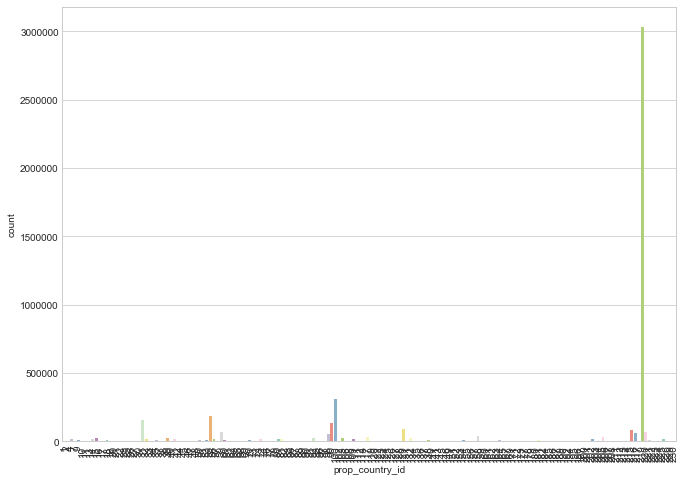

In [18]:
#in which countries are most hotels located
fig, ax = plt.subplots()
fig.set_size_inches(11,8)
g=sns.countplot('prop_country_id',data=expedia.sort_values(by=['prop_country_id']),palette='Set3')
g.set_xticklabels(g.get_xticklabels(),rotation=90)


In [19]:
expedia.describe()


,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,4.958347e+06,3.867999e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,138390.000000,4.958347e+06
mean,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,2.872589e+00,1.303852e-01,4.317913e+00,1.685624e+01,2.542096e+02,2.156198e-01,4.474858e-02,386.283316,2.791051e-02
std,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,1.531011e+00,1.594634e-01,1.834869e+00,1.042566e+01,1.600124e+04,4.112517e-01,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,1.790000e+00,1.900000e-02,4.450000e+00,8.000000e+00,8.500000e+01,0.000000e+00,0.000000e+00,124.000000,0.000000e+00
50%,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,2.770000e+00,6.900000e-02,4.910000e+00,1.600000e+01,1.220000e+02,0.000000e+00,0.000000e+00,218.400000,0.000000e+00
75%,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,4.040000e+00,1.805000e-01,5.310000e+00,2.600000e+01,1.849600e+02,0.000000e+00,0.000000e+00,429.790000,0.000000e+00
max,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,6.980000e+00,1.000000e+00,6.210000e+00,4.000000e+01,1.972633e+07,1.000000e+00,1.000000e+00,159292.380000,1.000000e+00


In [20]:
expedia.tail()


,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,click_bool,gross_bookings_usd,booking_bool
4958342,219,77700,3,4.0,1,1.61,0.0471,0.0,2,118.0,0,0,NaN,0
4958343,219,88083,3,4.0,1,1.95,0.1520,0.0,3,89.0,0,0,NaN,0
4958344,219,94508,3,3.5,1,1.10,0.0164,0.0,4,99.0,0,0,NaN,0
4958345,219,128360,3,5.0,1,1.95,0.0662,0.0,1,139.0,0,1,157.84,1
4958346,219,134949,3,2.5,1,1.10,NaN,0.0,6,61.0,0,0,NaN,0


In [21]:
sample = expedia.sample(100000)

In [22]:
sample.describe()


,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,click_bool,gross_bookings_usd,booking_bool
count,100000.000000,100000.000000,100000.000000,99829.000000,100000.000000,100000.000000,78065.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,2739.000000,100000.000000
mean,173.917170,70020.930630,3.182510,3.778491,0.632480,2.871127,0.130695,4.321387,16.871130,2.488713e+02,0.213790,0.043700,358.478010,0.027390
std,68.495385,40632.245881,1.054254,1.048300,0.482132,1.531292,0.159523,1.831057,10.394876,8.467894e+03,0.409982,0.204428,453.665011,0.163218
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,100.000000,34860.000000,3.000000,3.500000,0.000000,1.790000,0.019000,4.450000,8.000000,8.500000e+01,0.000000,0.000000,124.110000,0.000000
50%,219.000000,69640.000000,3.000000,4.000000,1.000000,2.770000,0.069200,4.910000,16.000000,1.220000e+02,0.000000,0.000000,212.870000,0.000000
75%,219.000000,105156.500000,4.000000,4.500000,1.000000,4.040000,0.180700,5.310000,26.000000,1.850000e+02,0.000000,0.000000,407.210000,0.000000
max,230.000000,140820.000000,5.000000,5.000000,1.000000,6.980000,1.000000,6.210000,40.000000,1.704460e+06,1.000000,1.000000,6701.920000,1.000000


([<matplotlib.axis.XTick at 0x10bb8c7b8>,
 <a list of 14 Text xticklabel objects>)

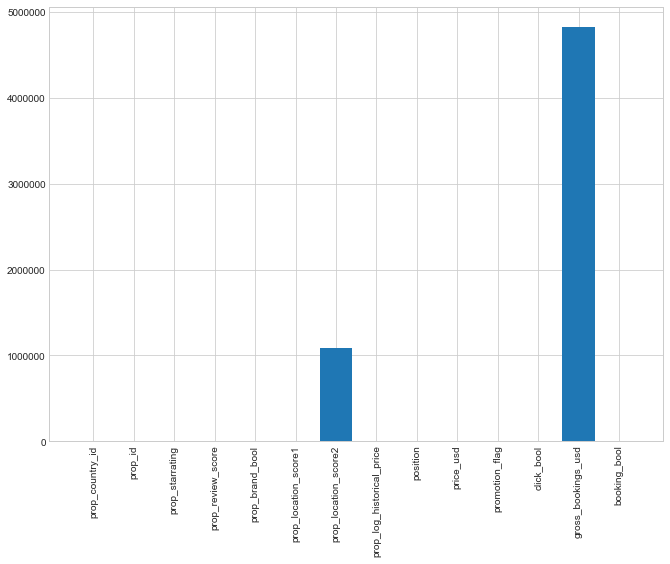

In [25]:
def get_null(prop,expedia):
    return sum(pd.isnull(expedia[prop]))

d = {prop: get_null(prop,expedia) for prop in list(expedia.keys())}
fig,ax = plt.subplots()
fig.set_size_inches(11,8)
plt.bar(range(len(d)),d.values(),align='center')
plt.xticks(range(len(d)),d.keys(),rotation=90)

In [23]:
null = pd.isnull(expedia['prop_location_score2'])
sum(null) #amount of NaN values in prop_location_score2

1090348

([<matplotlib.axis.XTick at 0x1de12c8588>,
 <a list of 14 Text xticklabel objects>)

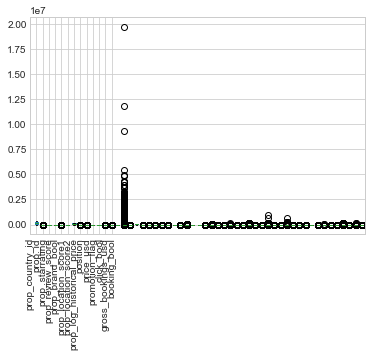

In [39]:
expedia_df.boxplot()
plt.xticks(range(len(d)),d.keys(),rotation=90)

In [37]:
pf = expedia['promotion_flag']


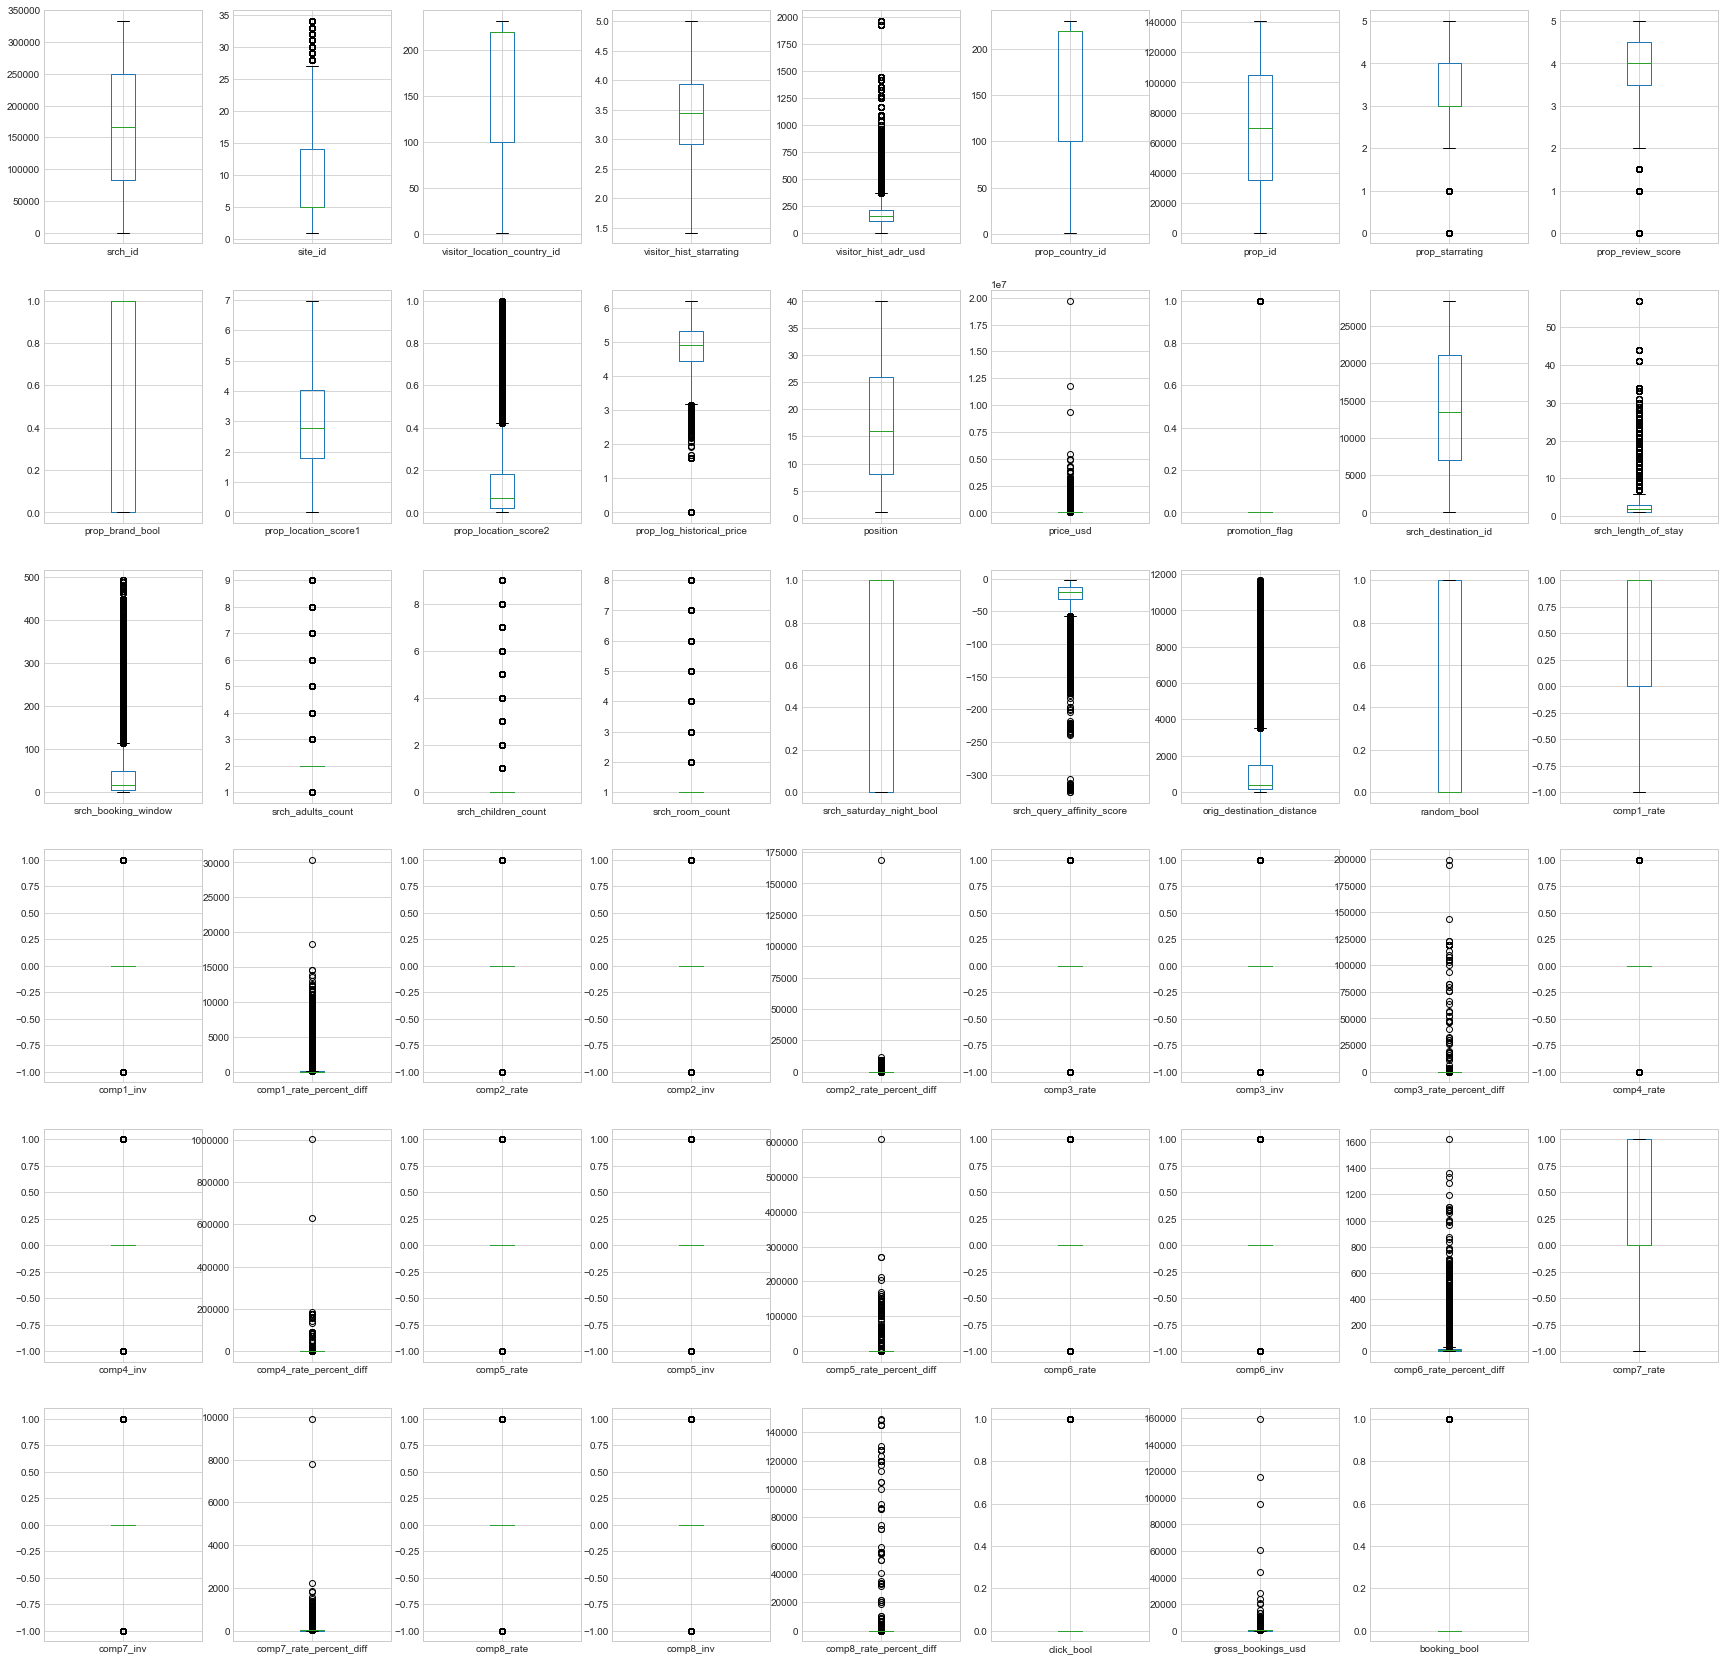

In [43]:
expedia_df.plot(kind='box', subplots=True, layout=(6,9), sharex=False, sharey=False)
fig=plt.gcf()
fig.set_size_inches(30,30)

plt.show()

(220, 2)


ValueError: could not convert string to float: '2013-06-30 19:55:18'

In [48]:
expedia_df["date_time"] = pd.to_datetime(expedia_df["date_time"]) #more usefull date information training set
expedia_df["year"] = expedia_df["date_time"].dt.year
expedia_df["month"] = expedia_df["date_time"].dt.month

In [50]:
test_df["date_time"] = pd.to_datetime(test_df["date_time"]) #more usefull date information test set
test_df["year"] = test_df["date_time"].dt.year
test_df["month"] = test_df["date_time"].dt.month


In [52]:
expedia_df.head()


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,year,month
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2013,4
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2013,4
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2013,4
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,-1.0,0.0,5.0,0,NaN,0,2013,4
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2013,4


In [59]:
import random

unique_users = expedia_df.srch_id.unique()

sel_user_id = random.sample(unique_user_id,10000)
train_sample = expedia_df[expedia_df.srch_id.isin(sel_user_id)]

#import random

#unique_users = train.user_id.unique()

#sel_user_id = random.sample(unique_user_id,10000)
#sel_train = train[train.user_id.isin(sel_user_ids)]



NameError: name 'users_id' is not defined

In [58]:
expedia_df['prop_location_score2']

0          0.0438
1          0.0149
2          0.0245
3          0.0125
4          0.1241
5          0.1302
6          0.0356
7             NaN
8          0.1238
9          0.1028
10            NaN
11         0.0377
12         0.0206
13         0.1255
14         0.0155
15         0.0072
16         0.0660
17         0.0038
18         0.1266
19         0.0150
20         0.0359
21         0.1149
22         0.0145
23         0.0465
24         0.0164
25         0.0071
26         0.0052
27         0.0032
28         0.2544
29            NaN
            ...  
4958317    0.1569
4958318    0.0857
4958319    0.0722
4958320    0.0941
4958321    0.0995
4958322    0.0527
4958323    0.1551
4958324    0.0990
4958325    0.1602
4958326    0.0258
4958327    0.1023
4958328    0.0492
4958329    0.1202
4958330    0.1476
4958331       NaN
4958332    0.0723
4958333    0.0854
4958334    0.0714
4958335    0.1533
4958336    0.0909
4958337    0.0691
4958338    0.0385
4958339    0.1475
4958340    0.1606
4958341   